---
title: "Assignment 3-3"
author: "Sangwon Ju, SNU GSPA"
date: 'NOV/27/2022'
format: 
    html:
        code-overflow: wrap
        code-fold: true
categories:
   "Machine Learning & Deep Learning for Data Science (2022 Fall)" 
image: image.png
---

Convolutional Neural Networks (Score: 107/100)

# Convolution Function

In [204]:
"""
Question (a)

Implement your own conv functions which performs convolution operation without using any neural network packages.
Make sure to handle all possible edge cases to receive full credits.
Keep in mind that height and width of the given image or filter are not always the same.
"""

import numpy as np


def convolution_naive(image, filter, stride=1, padding=0):
    """Performs 2D convolution operation with "4 nested for-loops".

    Args:
    - image: 2D numpy array
    - filter: 2D numpy array
    - stride, padding: integers

    Returns:
    - 2D numpy array : convolution results of the given image and filter.
    - Return None if stride is not compatible. (ex. image of 5*5 with filter 2*2 with stride 2, padding 0)
    - Return None if filter is larger than the given image.
    """

    ##### YOUR CODE #####
    h_i, w_i = image.shape
    h_f, w_f = filter.shape
    
    output_h = ((h_i + 2 * padding - h_f) / stride) + 1
    output_w = ((w_i + 2 * padding - w_f) / stride) + 1
    
    h_int = float(output_h).is_integer()
    w_int = float(output_w).is_integer()
    
    input = np.pad(image, [(padding, padding), (padding, padding)], 'constant')
    out_temp = np.zeros((np.int64(output_h), np.int64(output_w)))

    
    if (h_f < h_i) and (w_f < w_i) and (h_int == True & w_int == True) :
        for h in np.arange(np.int64(output_h)):
            s_h = h * stride
            for w in np.arange(np.int64(output_w)):
                s_w = w * stride
                
                value_list=[]
                for filter_h in np.arange(np.int64(h_f)): 
                    for filter_w in np.arange(np.int64(w_f)):
                        value = input[s_h+filter_h,s_w+filter_w] * filter[filter_h,filter_w]
                        value_list.append(value)
                        
                out_temp[h, w] = np.sum(value_list)
                
        output = out_temp
    else:
        output = None
    #####################
    return output
    

def convolution_vectorized(image, filter, stride=1, padding=0):
    """Performs 2D convolution operation with "less than or equal to 2 nested for-loops".

    Args:
    - image: 2D numpy array 
    - filter: 2D numpy array
    - stride, padding: integers

    Returns:
    - 2D numpy array : convolution results of the given image and filter..
    - Return None if stride is not compatible. (ex. image of 5*5 with filter 2*2 with stride 2, padding 0)
    - Return None if filter is larger than the given image.
    """

    ##### YOUR CODE #####
    h_i, w_i = image.shape
    h_f, w_f = filter.shape
    
    output_h = ((h_i + 2 * padding - h_f) / stride) + 1
    output_w = ((w_i + 2 * padding - w_f) / stride) + 1
    
    h_int = float(output_h).is_integer()
    w_int = float(output_w).is_integer()
    
    input = np.pad(image, [(padding, padding), (padding, padding)], 'constant')
    out_temp = np.zeros((np.int64(output_h), np.int64(output_w)))
    
    if (h_f < h_i) and (w_f < w_i) and (h_int == True & w_int == True) :
        for h in np.arange(np.int64(output_h)):
            s_h = h * stride
            e_h = s_h + h_f
            for w in np.arange(np.int64(output_w)): 
                s_w = w * stride
                e_w = s_w + w_f
                out_temp[h, w] = np.sum(input[s_h:e_h, s_w:e_w] * filter)
        output = out_temp           
    else:
        output = None
    #####################    
    return output

In [205]:
image = np.random.randint(10, size=(256, 256))
filter = np.random.randint(10, size=(16, 16))
stride = 1
padding = 0

print("Compare the time complexity of 2 convolution operations")
print("1. Convolution operation with 4 nested loops")
%timeit -n 3 -r 1 convolution_naive(image, filter, stride, padding)
print("2. Convolution operation with less than or equal to 2 nested loops")
%timeit -n 3 -r 1 convolution_vectorized(image, filter, stride, padding)

Compare the time complexity of 2 convolution operations
1. Convolution operation with 4 nested loops
12.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)
2. Convolution operation with less than or equal to 2 nested loops
387 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


In [10]:
image = np.array([[1, 2, 3, 2, 1], [2, 3, 4, 5, 6], [-1, -2, -3, -4, -5], [0, 0, 1, 0, 0], [7, 1, 7, 1, 7]])
filter = np.array([[1, 0], [0, 1]])
stride = 3
padding = 0

# Expected Result for each convolution functions.
# [[4. 8.]
#  [1. 7.]]
print(convolution_naive(image, filter, stride, padding))
print(convolution_vectorized(image, filter, stride, padding))


[[4. 8.]
 [1. 7.]]
[[4. 8.]
 [1. 7.]]


# Local Setup

In [4]:
"""
Change directory to where this file is located
"""
import os
# get current path
print(os.getcwd())
# change path
os.chdir("E:/OneDrive - SNU/(B) 대학원/수업/2022 2학기/데이터사이언스를위한머신러닝과딥러닝/과제3")
print(os.getcwd())

e:\OneDrive - SNU\(B) 대학원\수업\2022 2학기\데이터사이언스를위한머신러닝과딥러닝\과제3
E:\OneDrive - SNU\(B) 대학원\수업\2022 2학기\데이터사이언스를위한머신러닝과딥러닝\과제3


# Import Modules

In [5]:
import cv2
import numpy as np
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, datasets

In [6]:
"""
import modules you need
"""
import seaborn as sns
import plotnine as pn
from plotnine import *

# Utils

In [7]:
def plot_dataset(dataloader, grid_width=8, grid_height=2, figure_width=12, figure_height=3, y_hats=None):
    """
    Plots image and labels.

    Do NOT modify this function.
    """
    images, labels = next(iter(dataloader))
    f, ax = plt.subplots(grid_height, grid_width)
    f.set_size_inches(figure_width, figure_height)
    img_idx = 0
    for i in range(0, grid_height):
        for j in range(0, grid_width):
            image = images[img_idx]
            label = labels[img_idx]
            title_color = 'k'
            if y_hats is None:
                label_idx = int(label)
            else:
                label_idx = int(y_hats[img_idx])
                if int(labels[img_idx]) != label_idx:
                    title_color = 'r'
            label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'][label_idx]
            ax[i][j].axis('off')
            ax[i][j].set_title(label, color=title_color)
            ax[i][j].imshow(np.transpose(image, (1, 2, 0)), aspect='auto')
            img_idx += 1
        plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0.25)
    plt.show()

In [8]:
def train(model, train_loader, optimizer):
    """
    Trains the model with training data.

    Do NOT modify this function.
    """
    model.train()
    tqdm_bar = tqdm(train_loader)
    for batch_idx, (image, label) in enumerate(tqdm_bar):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()
        tqdm_bar.set_description("Epoch {} - train loss: {:.6f}".format(epoch, loss.item()))


def evaluate(model, test_loader):
    """
    Evaluates the trained model with test data.

    Do NOT modify this function.
    """
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for image, label in tqdm(test_loader):
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim=True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
    
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

# CIFAR-10 Data Augmentation

In [15]:
def gaussian_smoothing(image, filter_size=3, sigma=1.0):
    """
    Inputs
    - image: an input image of shape (32,32,3).
    Returns
    - image: image blurred with a Gaussian Filter.

    Do NOT modify this function.
    """
    center = (filter_size-1)/2
    gaussian_filter = np.zeros((filter_size, filter_size))
    for row in range(filter_size):
        for col in range(filter_size):
            gaussian_filter[row, col] = np.exp((-(row-center) ** 2 - (col-center) ** 2) / (2 * sigma ** 2)) / (2 * np.pi * sigma ** 2)
    gaussian_filter = gaussian_filter / np.sum(gaussian_filter)
    image = cv2.filter2D(image, -1, gaussian_filter)
    return image


def color_jitter(image):
    """
    Inputs
    - image: an input image of shape (32,32,3).
    Returns
    - image: image blurred with a Gaussian Filter.

    Do NOT modify this function.
    """
    image = cv2.convertScaleAbs(image, alpha=1.5, beta=20)
    return image

In [118]:
def horizontal_flip(image):
    """Flips the image horizontally.

    Question (b)
    - Do not use TorchVision or OpenCV library for this question.
    - You can solve the problem using numpy only.

    Inputs
    - image: an input image of shape (32, 32, 3).

    Returns
    - image: a horizontally-flipped image of shape (32, 32, 3).
    """
    ##### YOUR CODE #####
    newimage = image [:,::-1]
    image = newimage
    #####################
    return image

In [121]:
a = np.random.randint(10,size=(32,32,3))
np.sum(horizontal_flip(a) != np.flip(a,axis=1))

0

Files already downloaded and verified


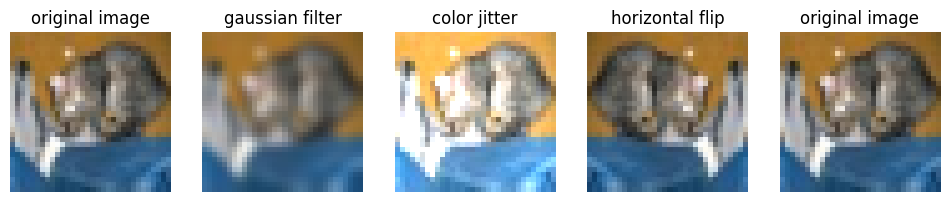

In [120]:
"""
Visualize how the augmentations are applied to a single image.

Do NOT modify.
"""

raw_test = datasets.CIFAR10(root="./CIFAR_10", train=False, download=True)

f, ax = plt.subplots(1, 5)
f.set_size_inches(12, 3)
x = raw_test[0][0]
x = np.array(x)
g = gaussian_smoothing(x)
j = color_jitter(x)
h = horizontal_flip(x)
title = ['original image', 'gaussian filter', 'color jitter', 'horizontal flip', 'original image']
for i, img in enumerate([x, g, j, h, x]):
    ax[i].imshow(img)
    ax[i].axis('off')
    ax[i].set_title(title[i], color='k')

In [ ]:
### 
# Question (b)
# Briefly explain whether horizontal flip is a good augmentation method for image classification task.
###

Write your answer to question (b) in this cell.

일반적으로 data augmentation은 추가적인 데이터에 대한 축적이나 라벨링 없이 완전히 새롭고 다양한 인스턴스들을 만들 수 있으므로 딥러닝 모델의 성능을 개선할 수 있다는 점에서 매우 효과적이다. 일반적으로 사진들을 찍을 때 자동적으로 좌우반전을 해주는 경우가 많다는 점에서, 또 이러한 맥 데이터의 갯수를 증가시킬 수 있고, 데이터의 오버피팅을 감소시키며 각 class들의 unbalance를 어느정도 극복하는데 사용될 수 있다는 점에서 그러하다. 그러나, MNIST와 같이 필체인식(OCR)을 위한 데이터들의 경우 좌우반전이나 상하반전등의 augmentation을 적용시에 완전히 이미지가 가진 의미가 사라지게 만든다는 점에서 좌우반전을 통해 이미지의 의미가 변화하는지 여부를 미리 판단해야할 필요성이 존재한다. 일반적인 상황에서는 좌우반전을 적용하면 모형 학습이 개선되어지므로, 모델 적용시 데이터 생성 맥락을 정확히 이해한 상태에서 augmentation을 적용함이 필요하다.   

In [165]:
class CustomDataset(Dataset):
    def __init__(self, train, prob=0.5, data_dir="./CIFAR_10"):
        """
        Do NOT modify this method.
        """
        self.data = datasets.CIFAR10(root=data_dir, train=train, download=True)
        self.prob = prob

    def __len__(self):
        """
        Do NOT modify this method.
        """
        return len(self.data)
    
    def __getitem__(self, idx):
        """
        Do NOT modify this method.
        """
        return self.data[idx]
    
    def transform(self, image):
        """
        Apply stochastic data augmentation to the given image.

        Question (c)
        - Convert the given RGB image into BGR scale using opencv library.
        - Apply random augmentation (gaussian smoothing, color jitter, and horizontal flip).
        - Random augmentation is applied with the probability of self.prob.
        - If self.prob = 0.5, 5 out of 10 images will be augmented on average.
        - Convert the augmented image back to RGB scale for training.

        Inputs
        - image: numpy array of an input image of shape (32,32,3).
        Returns
        - image: numpy array of the augmented input image with shape (32,32,3).
        """
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        ##### YOUR CODE #####
        augment_pool = [color_jitter, gaussian_smoothing,horizontal_flip]
    
        
        prob = self.prob
        augment = augment_pool[np.random.randint(len(augment_pool))]
        image = augment(image) if np.random.rand() <= prob else image      
        #####################        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return image

    def collate_fn(self, data):
        """
        Creates a batch of images and label tensors.

        Question (d)
        - Convert each image in the batch from PIL image to numpy array.
        - Transform the image using self.transform method to apply random augmentation.
        - Normalize the transformed image by mapping the range [0, 255] to range [0, 1].
        - Transpose the (H * W * C) format of the image into (C * H * W) format.
          - To be specific, the dimension of the original image is (32, 32, 3).
          - We want the dimension of the transposed image to be (3, 32, 32).
        - Convert the batch of preprocessed images into PyTorch float tensors.
        - Convert the batch of labels into PyTorch long tensors.
        - Do NOT use torchvision.transforms library!

        Inputs
        - list of tuples, each containing a PIL image and an integer label
        - number of tuples in the list == BATCH SIZE

        Returns
        - batch of image tensors, batch of label tensors
        - size: (BATCH, CHANNEL, HEIGHT, WIDTH), (BATCH)
        """
        batch_x, batch_y = [], []

        ##### YOUR CODE #####
        for image, label_idx in data:
          image = np.array(image)
          image = self.transform(image)
          image = (image - 0) / (255 - 0)
          image = image.transpose(2,0,1)
          image= torch.Tensor(image)          
          label_idx = torch.Tensor([label_idx])
          batch_x.append(image)
          batch_y.append(label_idx)
        batch_x = torch.stack(batch_x).float()
        batch_y = torch.cat(batch_y).long()
        ##############################
        return batch_x, batch_y
    

Files already downloaded and verified


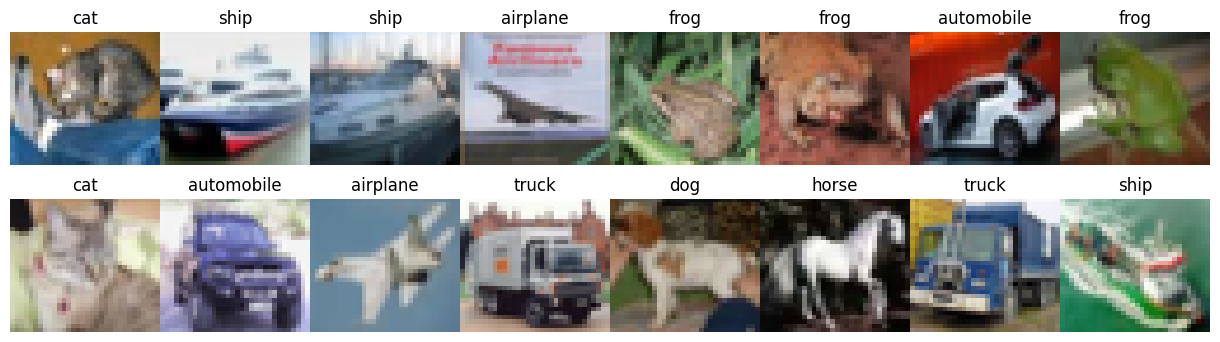

In [166]:
"""
Plot some example images and class labels without applying data augmentation.

Do NOT modify.
"""

raw_test_dataset = CustomDataset(train=False, prob=0, data_dir="./CIFAR_10")
raw_test_loader = DataLoader(dataset=raw_test_dataset, batch_size=16, shuffle=False, collate_fn=raw_test_dataset.collate_fn)

plot_dataset(raw_test_loader)

Files already downloaded and verified
Files already downloaded and verified


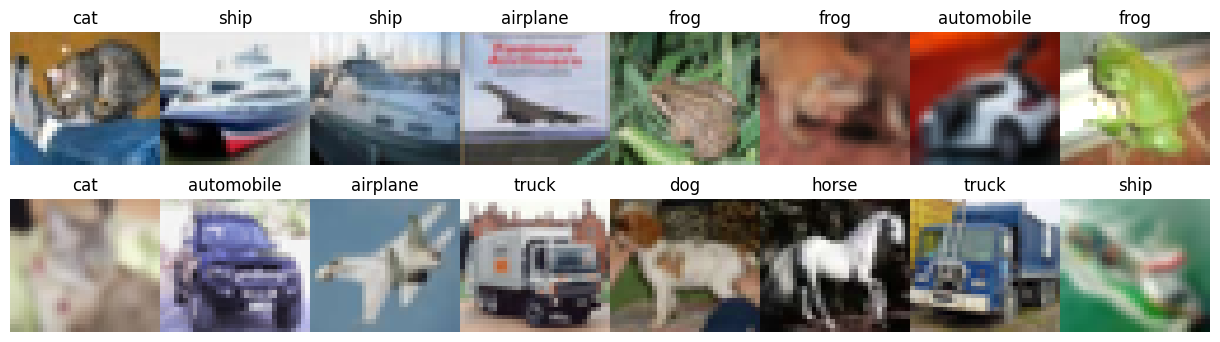

In [171]:
"""
Same examples after applying data augmentation with 50% probability.
If your transform (c) and collate_fn (d) methods have been implemented well, some of the results should look different from the ones above.

Do NOT modify.
"""

train_dataset = CustomDataset(train=True, prob=0.5)
test_dataset = CustomDataset(train=False, prob=0.5)

BATCH_SIZE = 64

train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=BATCH_SIZE, 
                          shuffle=True, 
                          collate_fn=train_dataset.collate_fn)
test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=BATCH_SIZE, 
                         shuffle=False, 
                         collate_fn=test_dataset.collate_fn)

plot_dataset(test_loader)

# ConvNet Image Classification

In [ ]:
### 
# Question (e)
# Train your ConvNet to achieve test accuracy above 70%
# You can try or add other training options such as SGD or callbacks to schedule learning rates if you want.
###

In [197]:
class ConvNet(nn.Module):
    """
    Builds a ConvNet model.

    Question (e)
    - things that might be useful...
    - stack [Conv2D + Conv2D + MaxPool2D] at least three times, 
    - follwed by at least three Linear layers.
    - 3x3 filter is enough, but feel free to use larger filter size.
    - channels used: [10, 32, 64, 128, 256, 512, 1024]
    - you can choose smaller or larger channel size as well.
    - The model may include BatchNormalization, regularizers, and Dropout, but they are not necessary.
    """
    def __init__(self):
        """
        Define the layers that you would like to use in your model.
        """
        super(ConvNet, self).__init__()

        ########## Your Code #########
        # convolutional layer
        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1, stride=1), # 3,32*32 -> 32,32*32
            nn.ReLU(),                              
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1, stride=1), 
            nn.ReLU(),                       
            nn.BatchNorm2d(32), 
            nn.MaxPool2d(2),
            nn.Dropout2d(p=0.25),        
                                           
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1, stride=1), # 32,16*16 -> 64,16*16
            nn.ReLU(),
            nn.BatchNorm2d(64),                   
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1, stride=1), 
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2), # 64,16*16 -> 64, 8*8
            nn.Dropout2d(p=0.3),
            
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1, stride=1), # 64,8*8 -> 128, 8*8
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(in_channels=128,out_channels=128, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.BatchNorm2d(128), 
            nn.MaxPool2d(2), # 128,8*8 -> 128, 4*4
            nn.Dropout2d(p=0.35),   
            )
        
        self.fc_layers = nn.Sequential(
            nn.Linear(128 * 4 * 4, 1024), 
            nn.BatchNorm1d(1024), 
            nn.ReLU(),
            nn.Linear(1024,10) 
        )
        ############################## 
    
    def forward(self, x):
        """
        Apply forward pass of the given batch of input images.
        Inputs
        - x: batch of input images.
        Returns
        - softmax probabilites of the input image for each class label
        """

        ##### YOUR CODE #####
        x = self.conv_layers(x) 
        x = x.view(x.size(0), -1) # flatten
        x = self.fc_layers(x)
        #####################

        return x

In [181]:
"""
Make sure your runtime type is GPU and you are using PyTorch version higher than 1.8!

Do NOT modify.
"""

DEVICE = torch.device('cuda') if torch.cuda.is_available else torch.device('cpu')
print("Using PyTorch version: {}, Device: {}".format(torch.__version__, DEVICE))

Using PyTorch version: 1.13.0+cu117, Device: cuda


In [201]:
"""
Load your customized model "ConvNet" and its training settings.
You may choose the number of epochs that you would like to train.
You might want to use different optimizers or learning rates.
"""

EPOCHS = 30
model = ConvNet().to(DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# Adam, AdamW, RMSprop, SGD 전부 사용했는데 Adam이 가장 결과가 적절하게 나옴.
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=12, gamma=0.1)
criterion = nn.CrossEntropyLoss()


print(model)

ConvNet(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Dropout2d(p=0.25, inplace=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Dropout2d(p=0.3, inplace=False)
    (15): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [202]:
"""
Train your model "ConvNet" with the augmented CIFAR-10 dataset.
Upon successful training, test accuracy of your model should be above 70%.

Do NOT modify.
"""

for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tModel: ConvNet, \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 1], 	Model: ConvNet, 	Test Loss: 0.0172, 	Test Accuracy: 61.08 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 2], 	Model: ConvNet, 	Test Loss: 0.0141, 	Test Accuracy: 68.58 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 3], 	Model: ConvNet, 	Test Loss: 0.0121, 	Test Accuracy: 73.30 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 4], 	Model: ConvNet, 	Test Loss: 0.0113, 	Test Accuracy: 75.06 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 5], 	Model: ConvNet, 	Test Loss: 0.0108, 	Test Accuracy: 76.69 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 6], 	Model: ConvNet, 	Test Loss: 0.0101, 	Test Accuracy: 78.09 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 7], 	Model: ConvNet, 	Test Loss: 0.0094, 	Test Accuracy: 79.44 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 8], 	Model: ConvNet, 	Test Loss: 0.0098, 	Test Accuracy: 78.95 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 9], 	Model: ConvNet, 	Test Loss: 0.0092, 	Test Accuracy: 80.10 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 10], 	Model: ConvNet, 	Test Loss: 0.0089, 	Test Accuracy: 80.93 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 11], 	Model: ConvNet, 	Test Loss: 0.0093, 	Test Accuracy: 79.92 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 12], 	Model: ConvNet, 	Test Loss: 0.0090, 	Test Accuracy: 81.00 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 13], 	Model: ConvNet, 	Test Loss: 0.0086, 	Test Accuracy: 81.35 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 14], 	Model: ConvNet, 	Test Loss: 0.0089, 	Test Accuracy: 81.17 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 15], 	Model: ConvNet, 	Test Loss: 0.0084, 	Test Accuracy: 82.29 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 16], 	Model: ConvNet, 	Test Loss: 0.0087, 	Test Accuracy: 81.46 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 17], 	Model: ConvNet, 	Test Loss: 0.0088, 	Test Accuracy: 81.43 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 18], 	Model: ConvNet, 	Test Loss: 0.0083, 	Test Accuracy: 82.69 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 19], 	Model: ConvNet, 	Test Loss: 0.0087, 	Test Accuracy: 82.19 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 20], 	Model: ConvNet, 	Test Loss: 0.0085, 	Test Accuracy: 82.58 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 21], 	Model: ConvNet, 	Test Loss: 0.0083, 	Test Accuracy: 82.67 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 22], 	Model: ConvNet, 	Test Loss: 0.0092, 	Test Accuracy: 81.66 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 23], 	Model: ConvNet, 	Test Loss: 0.0084, 	Test Accuracy: 82.99 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 24], 	Model: ConvNet, 	Test Loss: 0.0088, 	Test Accuracy: 82.29 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 25], 	Model: ConvNet, 	Test Loss: 0.0085, 	Test Accuracy: 83.00 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 26], 	Model: ConvNet, 	Test Loss: 0.0083, 	Test Accuracy: 83.27 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 27], 	Model: ConvNet, 	Test Loss: 0.0087, 	Test Accuracy: 82.97 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 28], 	Model: ConvNet, 	Test Loss: 0.0087, 	Test Accuracy: 82.80 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 29], 	Model: ConvNet, 	Test Loss: 0.0087, 	Test Accuracy: 82.86 % 



  0%|          | 0/782 [00:00<?, ?it/s]

  0%|          | 0/157 [00:00<?, ?it/s]


[EPOCH: 30], 	Model: ConvNet, 	Test Loss: 0.0089, 	Test Accuracy: 82.85 % 

